In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import qgrid
import numpy as np
import json

%matplotlib inline
sns.set(style="darkgrid")
figsize=(20,10)

In [2]:
counts_twitter = pd.read_csv("../data/counts_twitter.csv")

In [3]:
counts_twitter = counts_twitter.sort_values(by=["counts"], ascending=False)

[Text(0, 0, 'staronline'),
 Text(0, 0, 'ChannelNewsAsia'),
 Text(0, 0, 'malaysiagazette'),
 Text(0, 0, 'fmtoday'),
 Text(0, 0, 'malaysiakini'),
 Text(0, 0, 'msianinsight'),
 Text(0, 0, 'mkini_bm'),
 Text(0, 0, 'm_dateline'),
 Text(0, 0, 'theSundaily'),
 Text(0, 0, 'utusanborneo'),
 Text(0, 0, 'kosmo_online'),
 Text(0, 0, 'mstaronline'),
 Text(0, 0, 'TMReserve'),
 Text(0, 0, 'TODAYonline'),
 Text(0, 0, 'bernamadotcom'),
 Text(0, 0, 'MsiaChronicle'),
 Text(0, 0, 'bharianmy'),
 Text(0, 0, 'RajaPetra'),
 Text(0, 0, 'myedgeprop'),
 Text(0, 0, 'SabahNewsToday'),
 Text(0, 0, 'astro_gempak'),
 Text(0, 0, 'AJEnglish'),
 Text(0, 0, 'borneotodaynews'),
 Text(0, 0, 'NST_Online'),
 Text(0, 0, 'TheThirdForceMY'),
 Text(0, 0, 'The_Mole'),
 Text(0, 0, 'Diplomat_APAC'),
 Text(0, 0, 'aliranmalaysia'),
 Text(0, 0, 'LobakMerahMY'),
 Text(0, 0, 'saysdotcom'),
 Text(0, 0, 'theborneopost'),
 Text(0, 0, 'cilisosmy'),
 Text(0, 0, 'theedgemarkets'),
 Text(0, 0, 'umonline'),
 Text(0, 0, 'theskop'),
 Text(0, 0, '

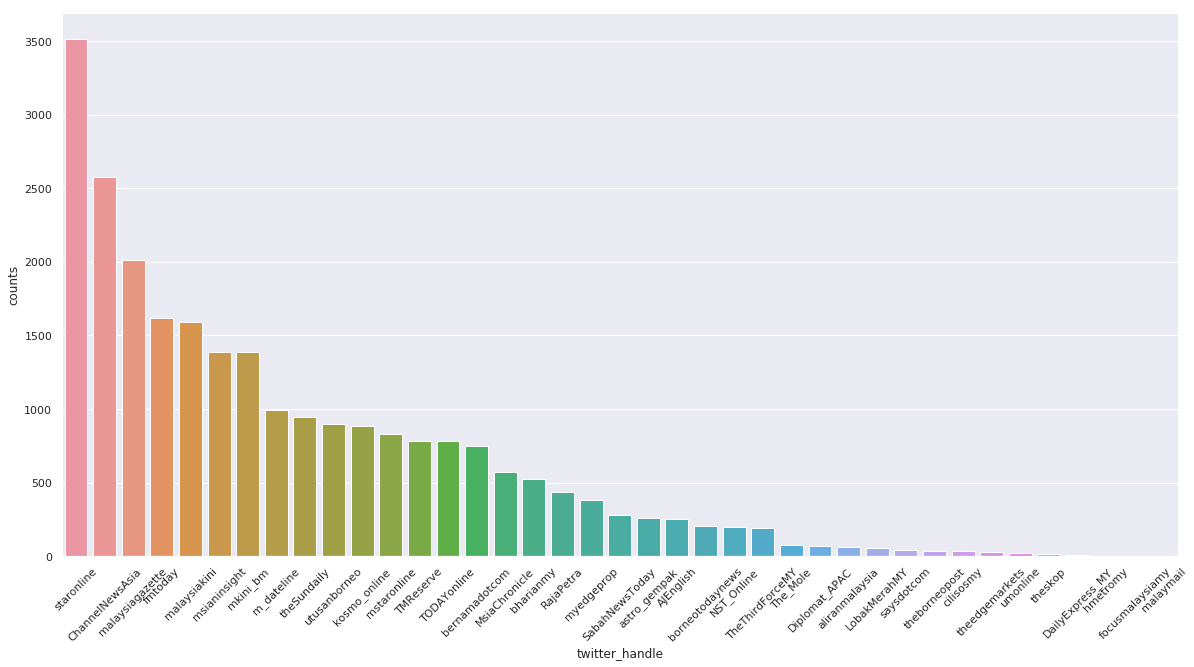

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x="twitter_handle", y="counts", data=counts_twitter, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [5]:
filtered_sentiment_ratio = pd.read_csv("../data/selected_sentiment_ratio.csv", sep="\t")
filtered_sentiment_ratio = filtered_sentiment_ratio.drop(["positive", "negative"], axis=1)
filtered_sentiment_ratio

,entity,total,positive_counts,negative_counts
0,BN,183,107,76
1,Najib,128,49,79
2,DAP,119,36,83
3,China,111,57,54
4,Mahathir,100,44,56
5,Cameron Highlands,93,66,27
6,Umno,80,29,51
7,Israel,79,20,59
8,Sabah,74,47,27
9,PAS,70,29,41


In [6]:
melted = pd.melt(filtered_sentiment_ratio, id_vars="entity", var_name="total_type", value_name="total")
melted

,entity,total_type,total
0,BN,total,183
1,Najib,total,128
2,DAP,total,119
3,China,total,111
4,Mahathir,total,100
5,Cameron Highlands,total,93
6,Umno,total,80
7,Israel,total,79
8,Sabah,total,74
9,PAS,total,70


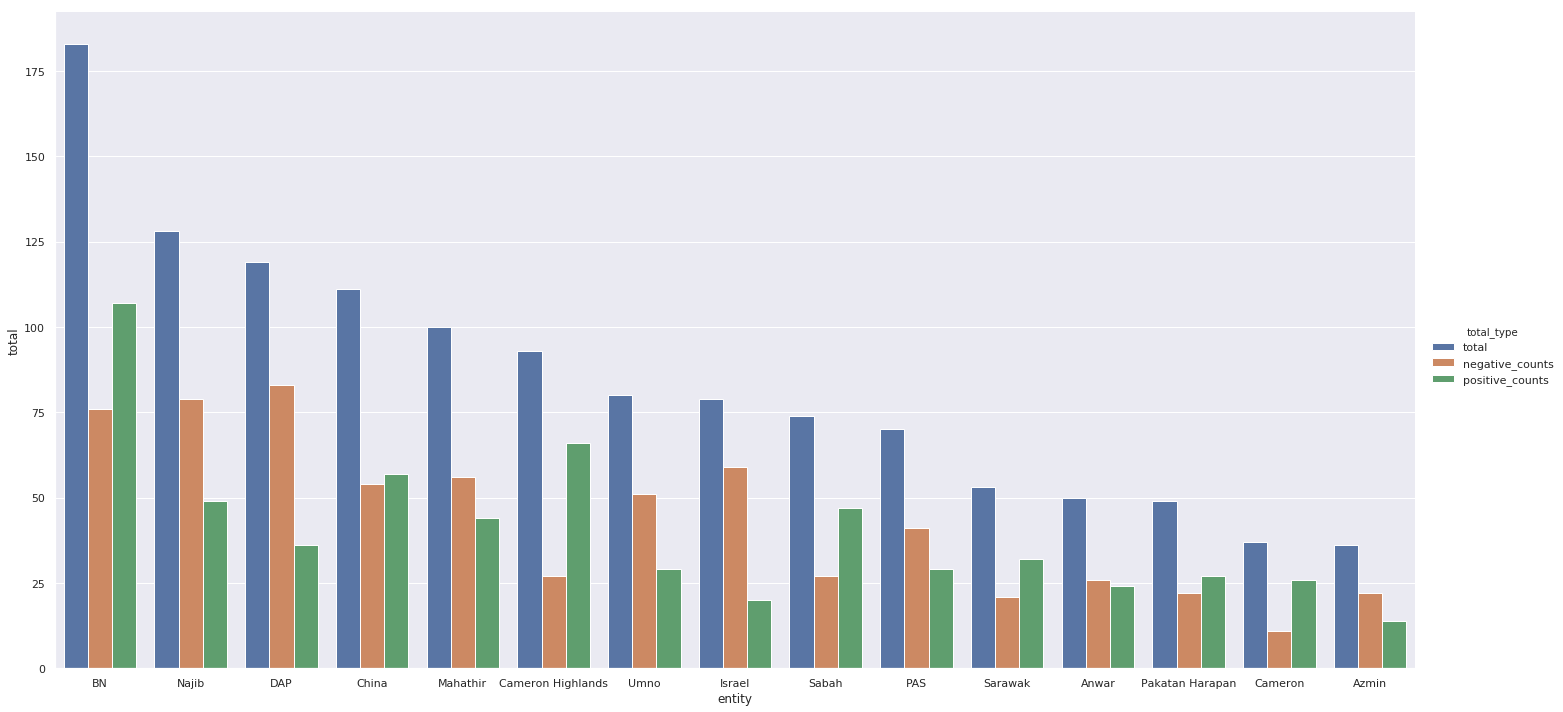

In [7]:
ax = sns.catplot(x="entity", y="total", hue="total_type", data=melted, kind="bar", hue_order=["total", "negative_counts", "positive_counts"], height=10, aspect=2)

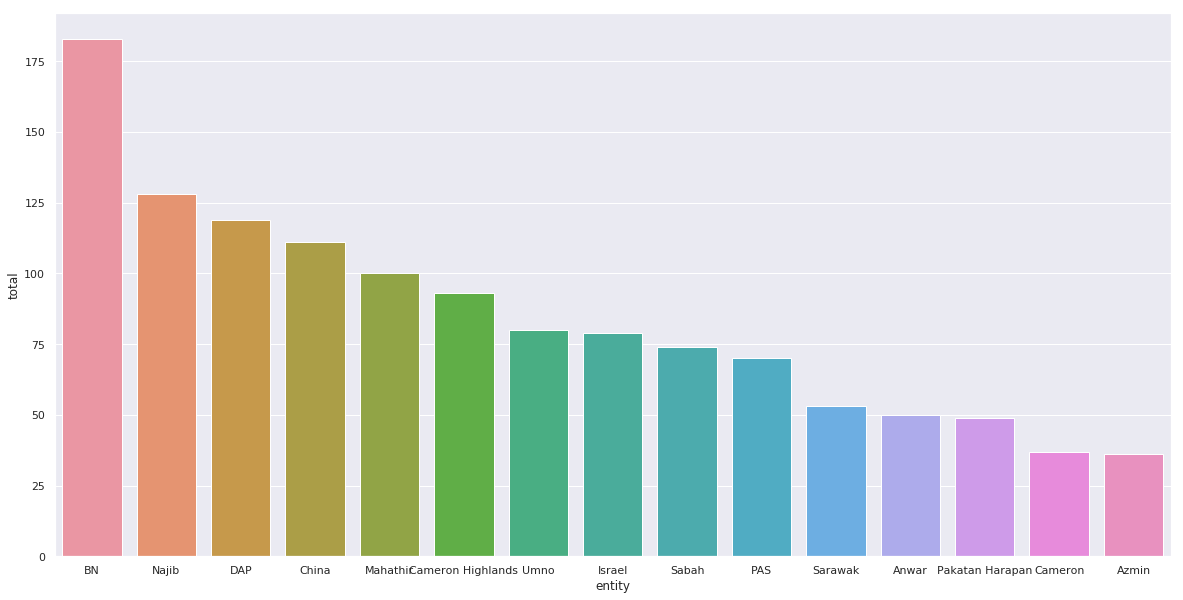

In [8]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x="entity", y="total", data=filtered_sentiment_ratio, ax=ax)

In [9]:
opposition_keys = ["BN", "Najib", "Umno"]
government_keys = ["DAP", "Mahathir", "Anwar", "Pakatan Harapan", "Azmin"]

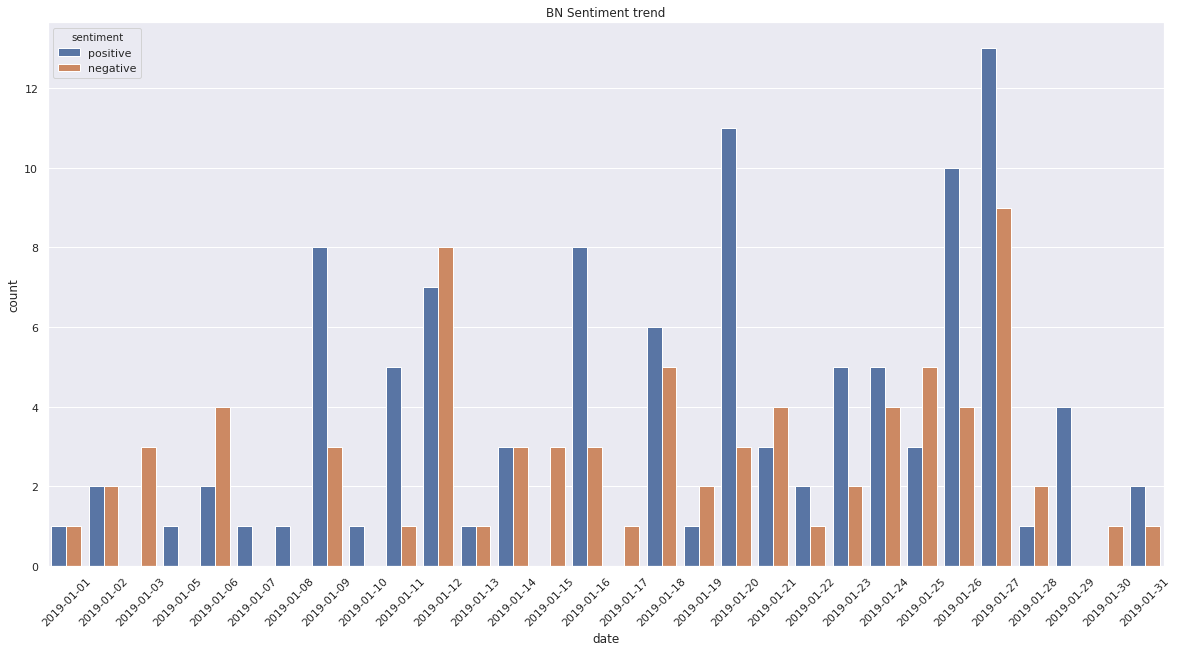

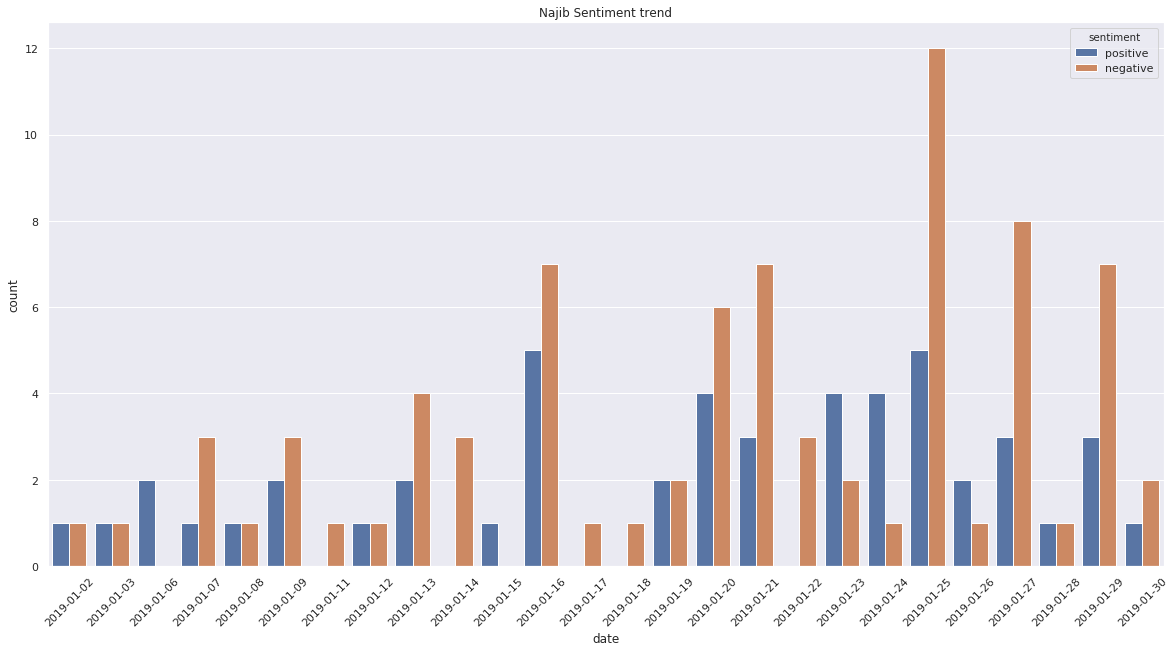

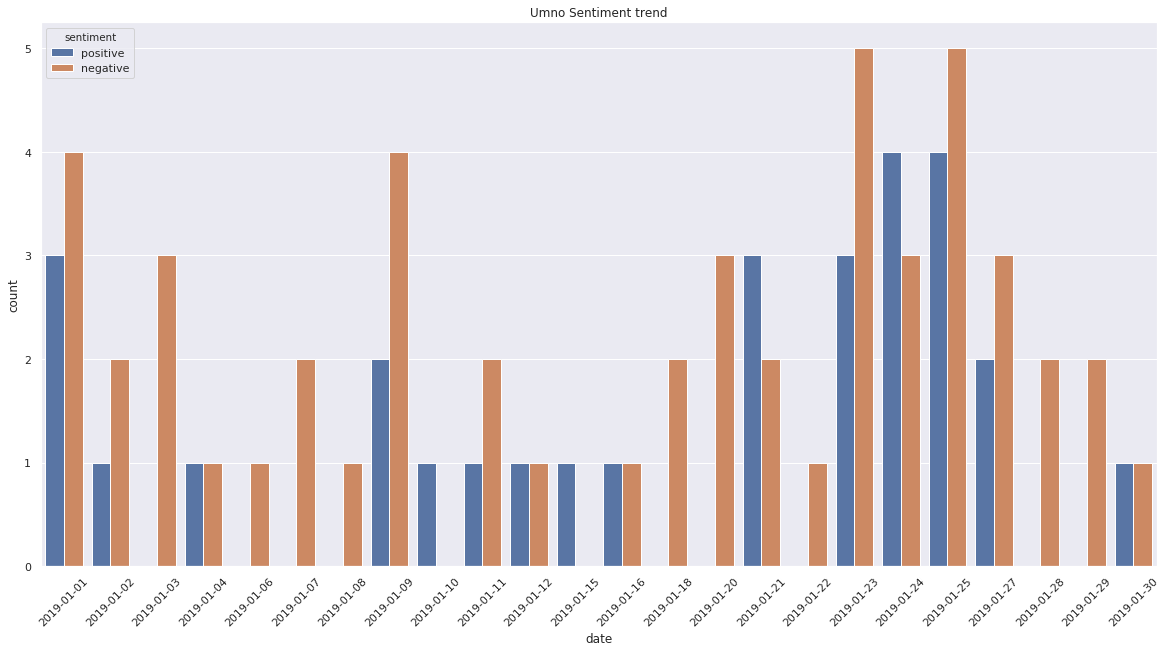

In [10]:
for opposition in opposition_keys:
    
    
    bn_df = pd.read_csv("../data/selected_trends/opposition/{}.csv".format(opposition))
    bn_df = bn_df.sort_values(by=["date"])
    bn_df['date'] = bn_df['date'].astype('datetime64[ns]')
    bn_df['date'] = [time.date() for time in bn_df['date']]
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x="date", y="count", hue="sentiment", hue_order=["positive", "negative"], ax=ax, data=bn_df)
    ax.set_title('{} Sentiment trend'.format(opposition))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

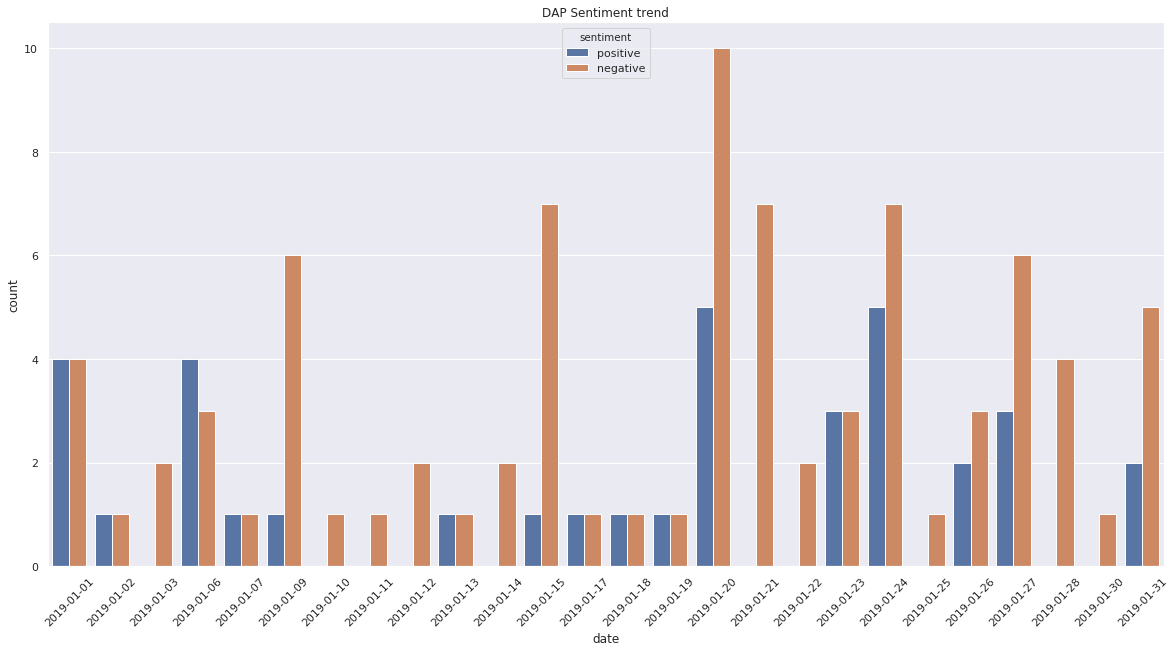

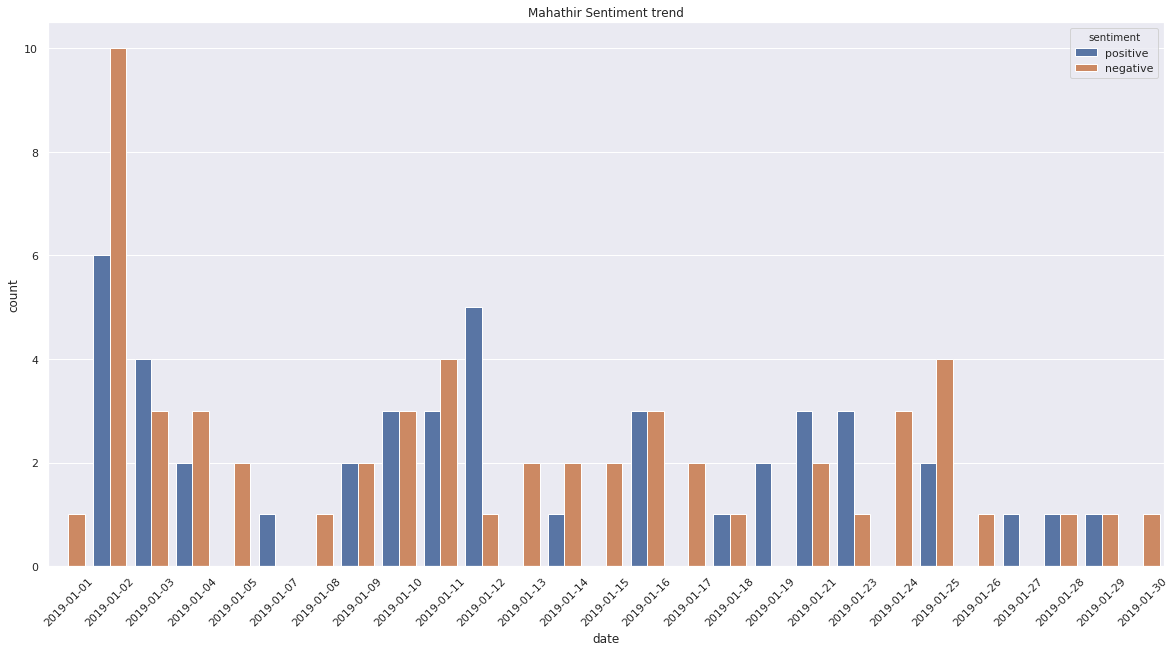

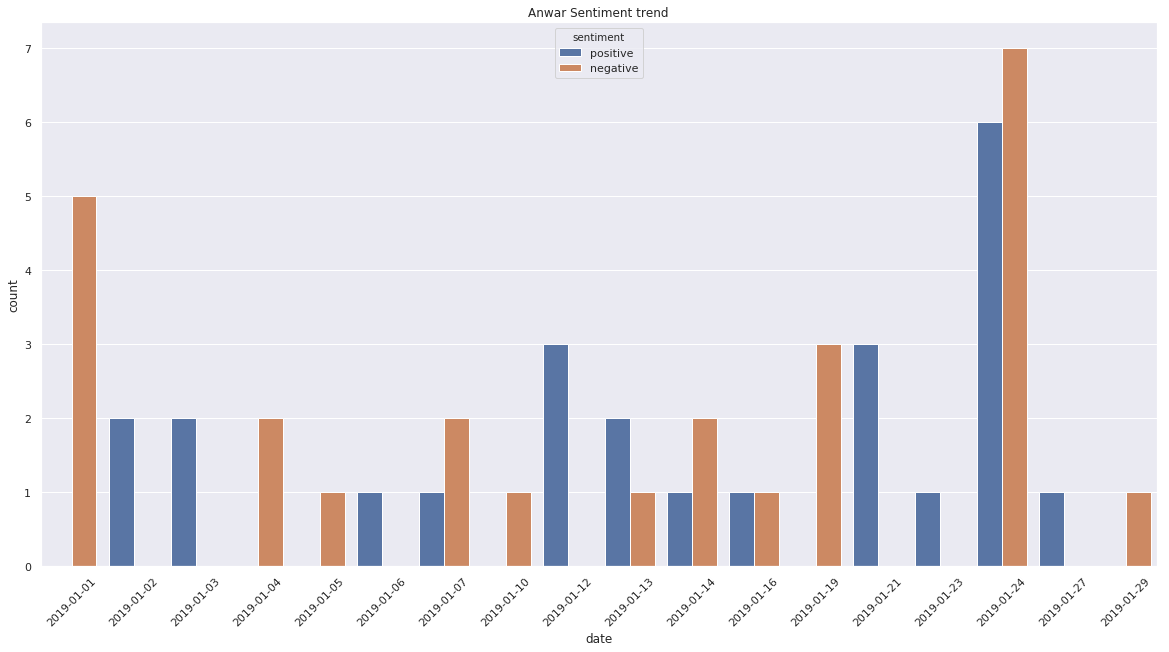

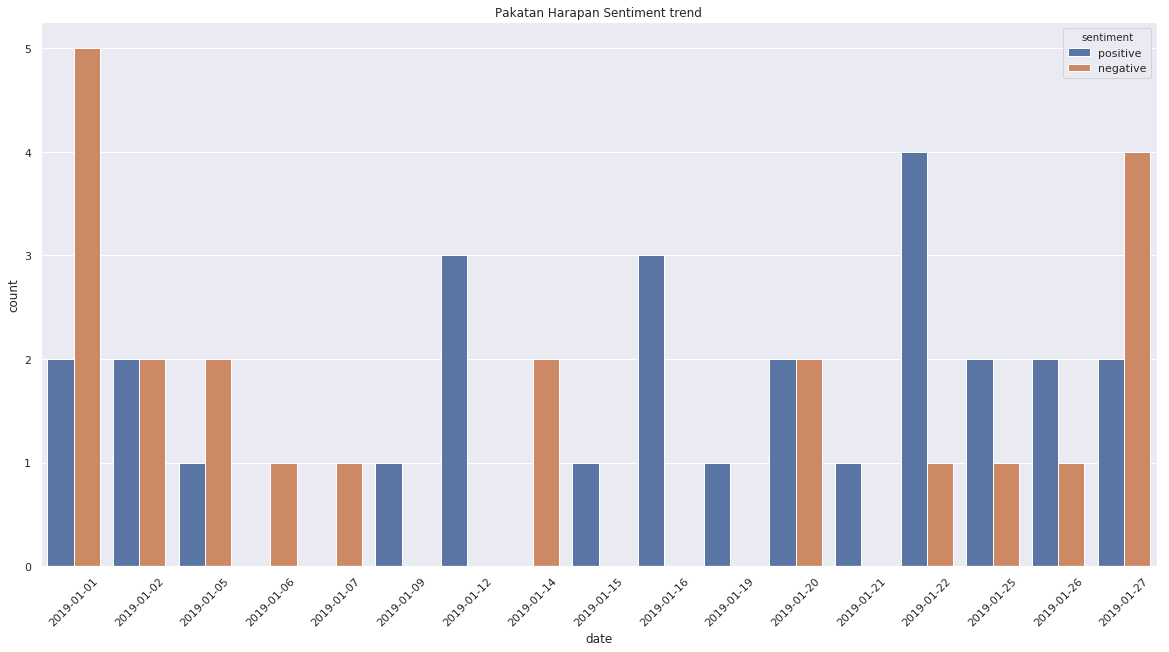

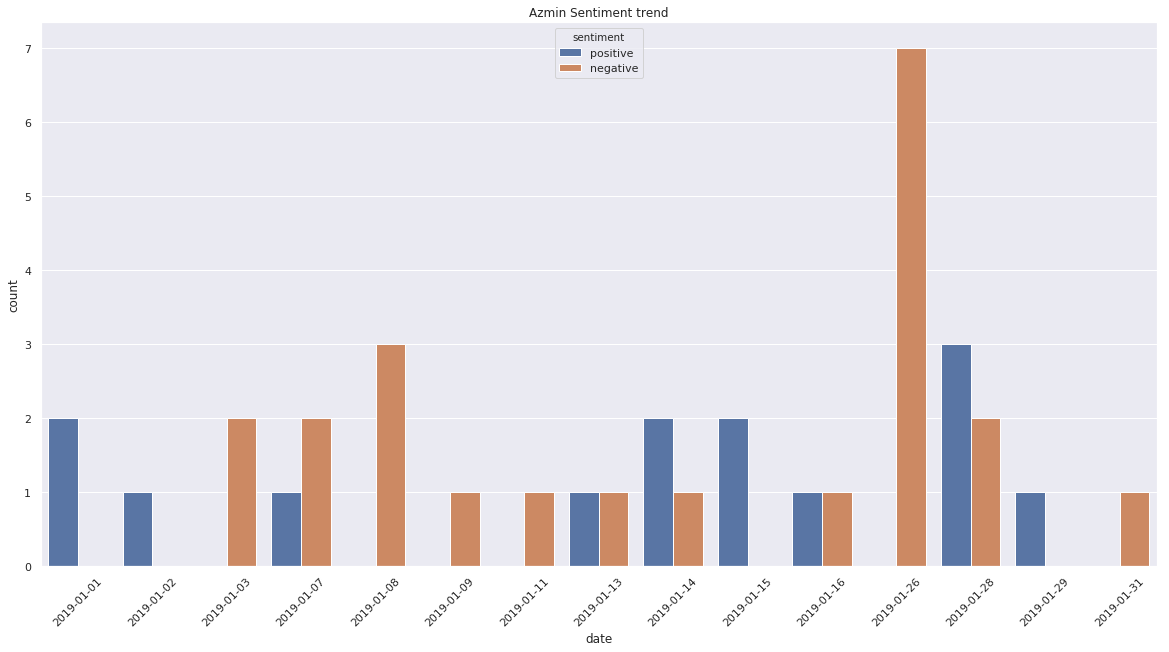

In [11]:
for government in government_keys:

    gov_df = pd.read_csv("../data/selected_trends/government/{}.csv".format(government))
    gov_df = gov_df.sort_values(by=["date"])
    gov_df['date'] = gov_df['date'].astype('datetime64[ns]')
    gov_df['date'] = [time.date() for time in gov_df['date']]
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x="date", y="count", hue="sentiment", hue_order=["positive", "negative"], ax=ax, data=gov_df)
    ax.set_title('{} Sentiment trend'.format(government))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '2019-01-01'),
 Text(0, 0, '2019-01-02'),
 Text(0, 0, '2019-01-03'),
 Text(0, 0, '2019-01-04'),
 Text(0, 0, '2019-01-05'),
 Text(0, 0, '2019-01-06'),
 Text(0, 0, '2019-01-07'),
 Text(0, 0, '2019-01-08'),
 Text(0, 0, '2019-01-09'),
 Text(0, 0, '2019-01-10'),
 Text(0, 0, '2019-01-11'),
 Text(0, 0, '2019-01-12'),
 Text(0, 0, '2019-01-13'),
 Text(0, 0, '2019-01-14'),
 Text(0, 0, '2019-01-15'),
 Text(0, 0, '2019-01-16'),
 Text(0, 0, '2019-01-17'),
 Text(0, 0, '2019-01-18'),
 Text(0, 0, '2019-01-19'),
 Text(0, 0, '2019-01-20'),
 Text(0, 0, '2019-01-21'),
 Text(0, 0, '2019-01-22'),
 Text(0, 0, '2019-01-23'),
 Text(0, 0, '2019-01-24'),
 Text(0, 0, '2019-01-25'),
 Text(0, 0, '2019-01-26'),
 Text(0, 0, '2019-01-27'),
 Text(0, 0, '2019-01-28'),
 Text(0, 0, '2019-01-29'),
 Text(0, 0, '2019-01-30'),
 Text(0, 0, '2019-01-31')]

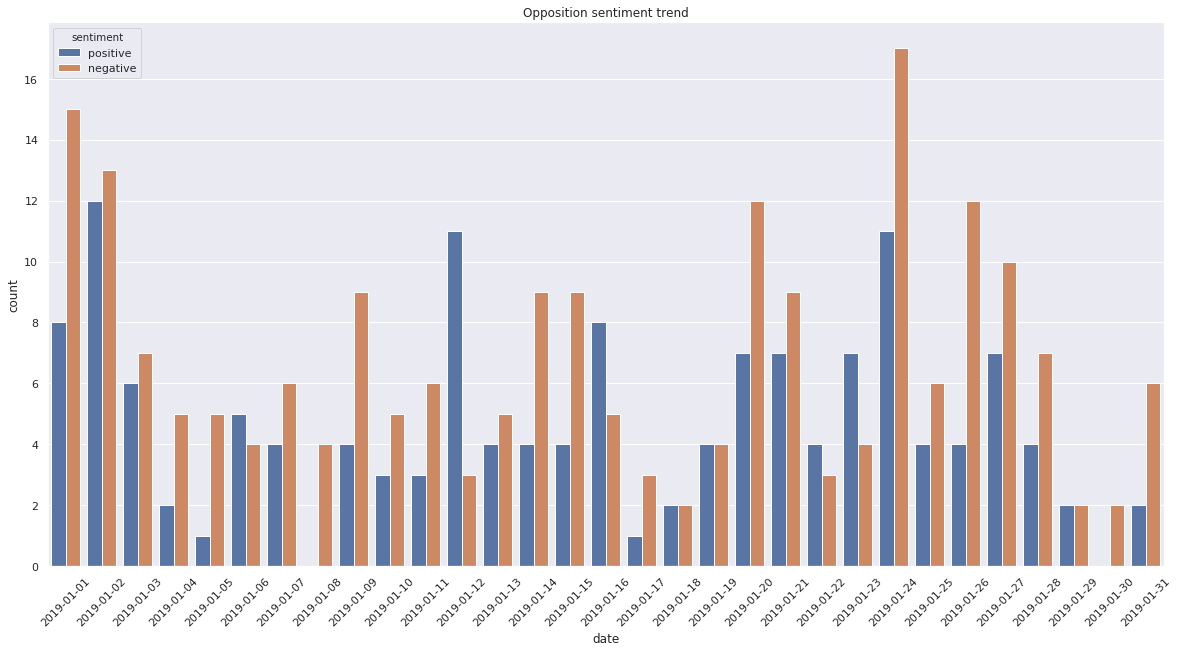

In [12]:
bn_df = pd.read_csv("../data/selected_trends/opposition.csv")
bn_df = bn_df.sort_values(by=["date"])
bn_df['date'] = bn_df['date'].astype('datetime64[ns]')
bn_df['date'] = [time.date() for time in bn_df['date']]
fig, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x="date", y="count", hue="sentiment", hue_order=["positive", "negative"], ax=ax, data=bn_df)
ax.set_title('Opposition sentiment trend')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '2019-01-01'),
 Text(0, 0, '2019-01-02'),
 Text(0, 0, '2019-01-03'),
 Text(0, 0, '2019-01-04'),
 Text(0, 0, '2019-01-05'),
 Text(0, 0, '2019-01-06'),
 Text(0, 0, '2019-01-07'),
 Text(0, 0, '2019-01-08'),
 Text(0, 0, '2019-01-09'),
 Text(0, 0, '2019-01-10'),
 Text(0, 0, '2019-01-11'),
 Text(0, 0, '2019-01-12'),
 Text(0, 0, '2019-01-13'),
 Text(0, 0, '2019-01-14'),
 Text(0, 0, '2019-01-15'),
 Text(0, 0, '2019-01-16'),
 Text(0, 0, '2019-01-17'),
 Text(0, 0, '2019-01-18'),
 Text(0, 0, '2019-01-19'),
 Text(0, 0, '2019-01-20'),
 Text(0, 0, '2019-01-21'),
 Text(0, 0, '2019-01-22'),
 Text(0, 0, '2019-01-23'),
 Text(0, 0, '2019-01-24'),
 Text(0, 0, '2019-01-25'),
 Text(0, 0, '2019-01-26'),
 Text(0, 0, '2019-01-27'),
 Text(0, 0, '2019-01-28'),
 Text(0, 0, '2019-01-29'),
 Text(0, 0, '2019-01-30'),
 Text(0, 0, '2019-01-31')]

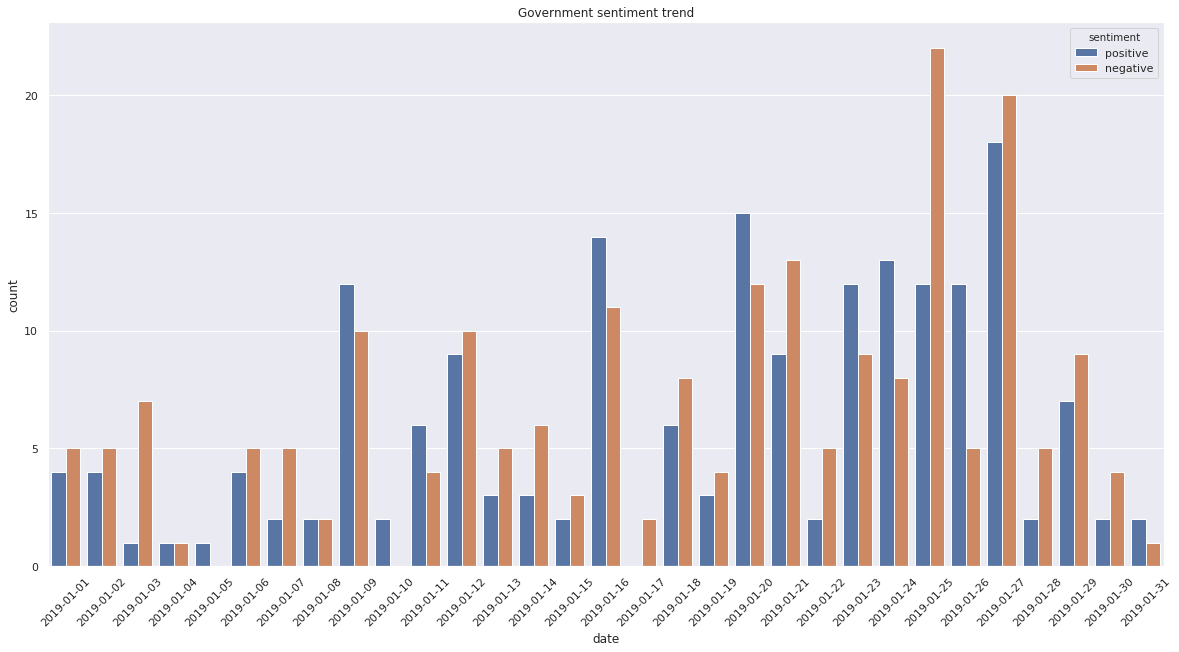

In [13]:
bn_df = pd.read_csv("../data/selected_trends/government.csv")
bn_df = bn_df.sort_values(by=["date"])
bn_df['date'] = bn_df['date'].astype('datetime64[ns]')
bn_df['date'] = [time.date() for time in bn_df['date']]
fig, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x="date", y="count", hue="sentiment", hue_order=["positive", "negative"], ax=ax, data=bn_df)
ax.set_title('Government sentiment trend')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [14]:
df = pd.read_csv("../data/focused_sentiment_entities.csv")
df = df.sort_values(by=["publish_date"])
df['publish_date'] = df['publish_date'].astype('datetime64[ns]')
df['publish_date'] = [time.date() for time in df['publish_date']]

qgrid_widget = qgrid.show_grid(df, show_toolbar=True)

qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
government_df = df[df["group"] == "government"]
opposition_df = df[df["group"] == "opposition"]

government_positive_df = government_df[government_df["sentiment"] == "positive"]
government_negative_df = government_df[government_df["sentiment"] == "negative"]

opposition_positive_df = opposition_df[opposition_df["sentiment"] == "positive"]
opposition_negative_df = opposition_df[opposition_df["sentiment"] == "negative"]


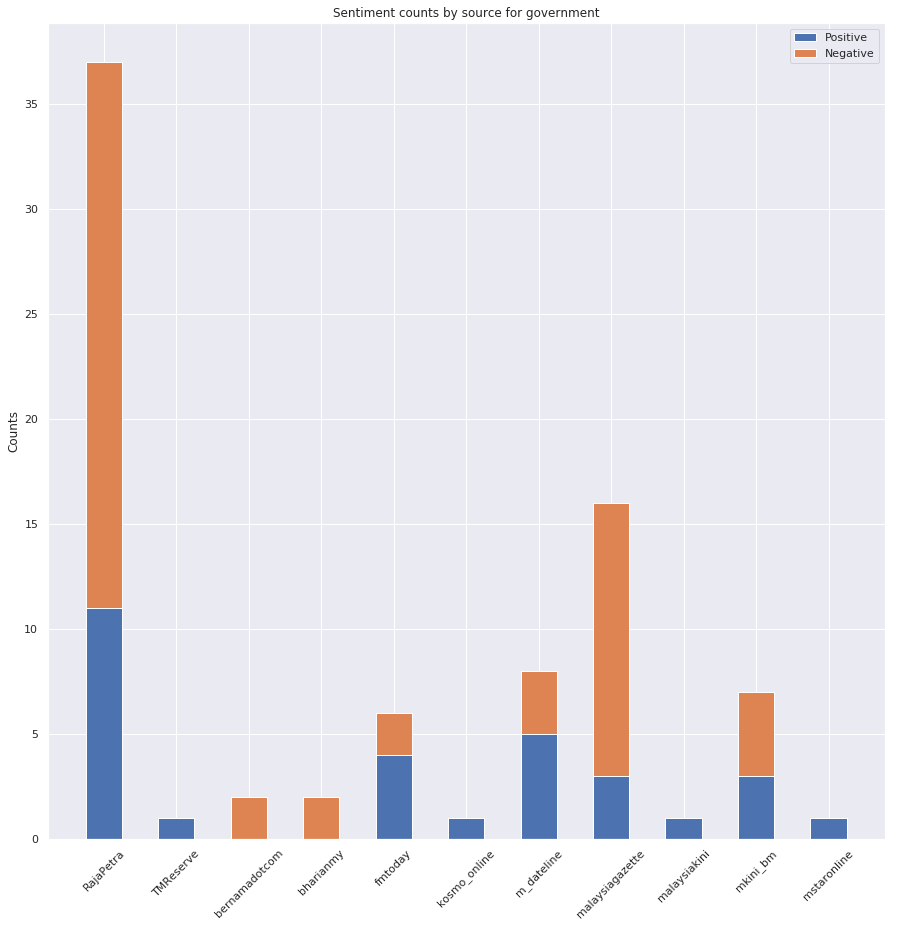

In [18]:
source_distribution = json.load(open("../data/selected_trends/tacked_government.json"))

government = source_distribution["government"]

N = len(government[0])

positives = government[0]
negatives = government[1]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence


plt.figure(figsize=(15,15))

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width,
             bottom=positives)

plt.ylabel('Counts')
plt.title('Sentiment counts by source for government')
plt.xticks(ind, government[2], rotation=45)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))
plt.show()

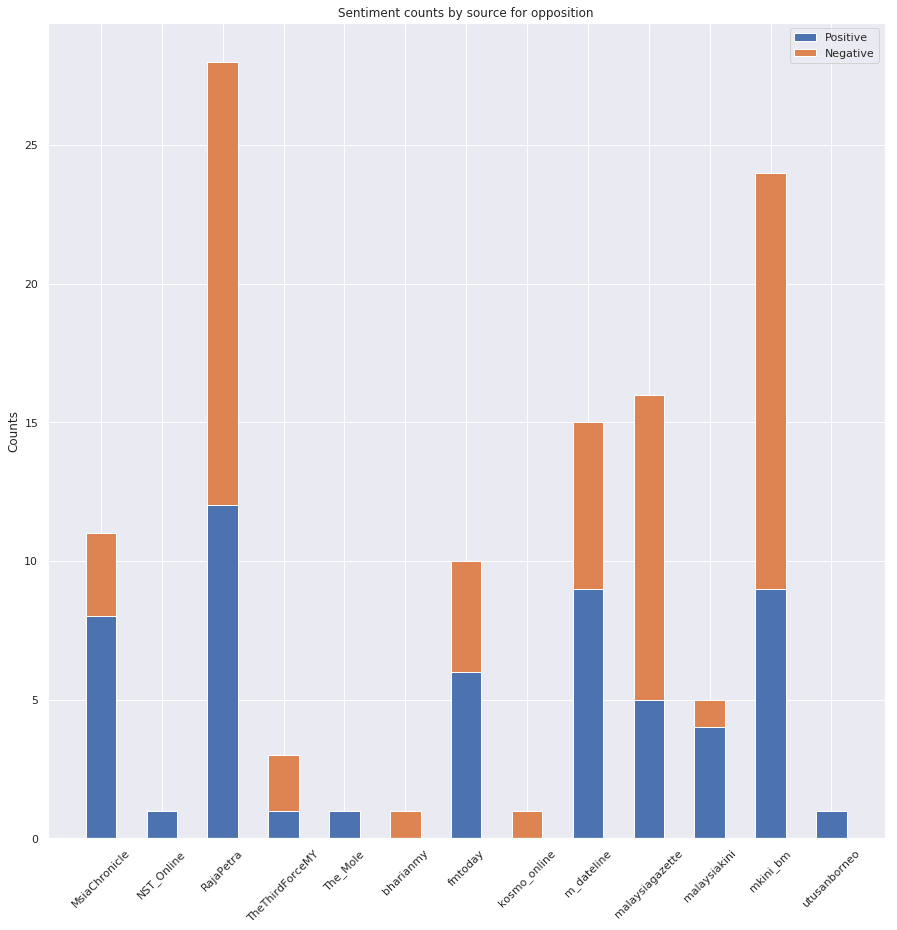

In [19]:
opposition = source_distribution["opposition"]

N = len(opposition[0])

positives = opposition[0]
negatives = opposition[1]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,15))

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width,
             bottom=positives)

plt.ylabel('Counts')
plt.title('Sentiment counts by source for opposition')
plt.xticks(ind, opposition[2], rotation=45)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))
plt.show()

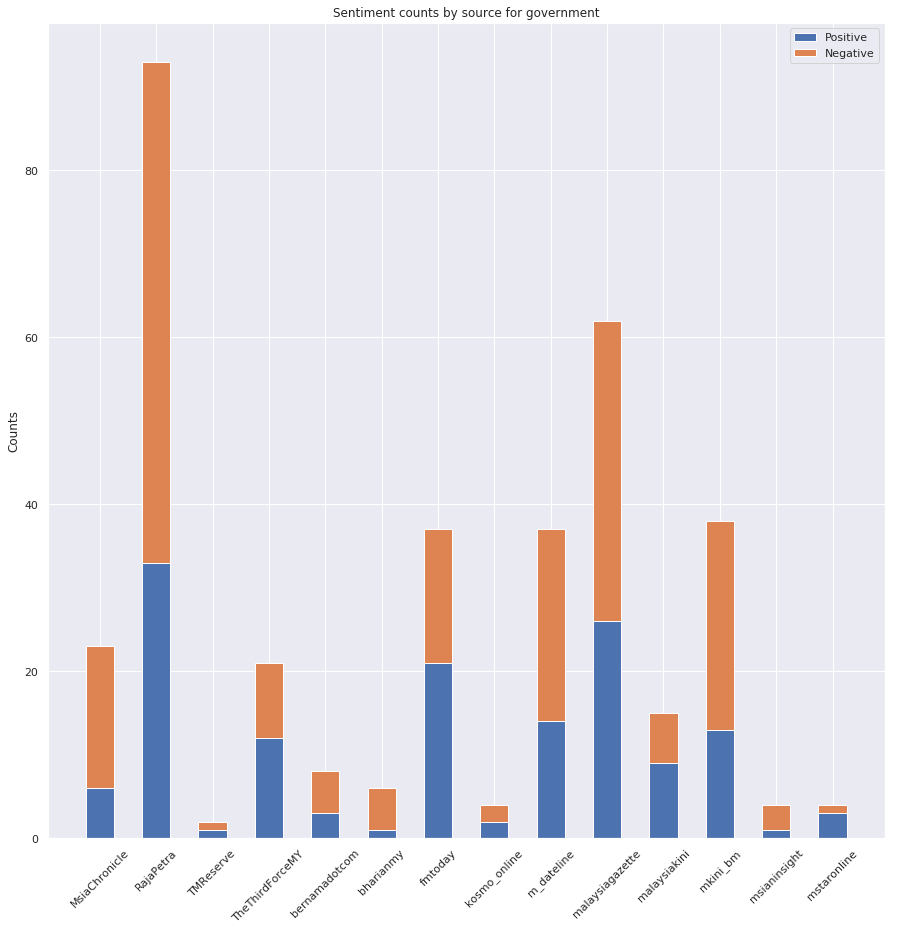

In [21]:
source_distribution = json.load(open("../data/selected_trends/tacked_government_jan2019.json"))

government = source_distribution["government"]

N = len(government[0])

positives = government[0]
negatives = government[1]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence


plt.figure(figsize=(15,15))

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width,
             bottom=positives)

plt.ylabel('Counts')
plt.title('Sentiment counts by source for government')
plt.xticks(ind, government[2], rotation=45)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))
plt.show()

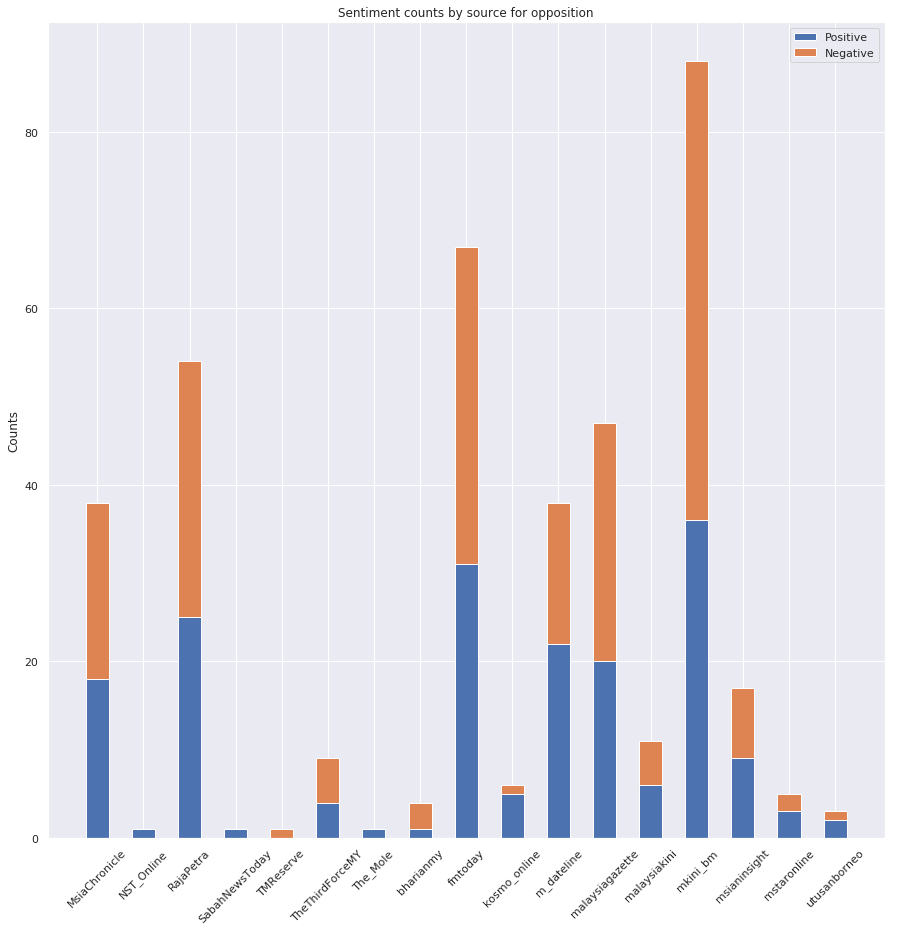

In [22]:
opposition = source_distribution["opposition"]

N = len(opposition[0])

positives = opposition[0]
negatives = opposition[1]

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,15))

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width,
             bottom=positives)

plt.ylabel('Counts')
plt.title('Sentiment counts by source for opposition')
plt.xticks(ind, opposition[2], rotation=45)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))
plt.show()